<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Assignment 2</h1>


## Social Impact Theory with Reddit Data

In [1]:
# install requirements
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install praw

### Import requirements
The cell below imports all necessary dependancies. Make sure they are installed (see cell above).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import json
import praw
import os
#from dotenv import load_dotenv
from praw.models import Submission, Comment
from tqdm import tqdm

### Exercise 1: Load Reddit data

​
#### Sign up for the Reddit API
* In this part of the assignment we will collect data using the Reddit API.
* First, you need to sign up for the Reddit API. For this, follow the steps outlined in [this guide](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c). You will need to create an app on the following [link](https://old.reddit.com/prefs/apps/).
* The [PRAW package](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) has been installed, which provides a nice wrapper for the Reddit API.
​
#### Collect the data 
* After you have created the Reddit instance with the praw package extract the 200 most popular subreddits and store them in a list. 
* Extract the top 20 `hottest` submissions from each of your selected subreddits, ignoring `pinned` submissions.
* Store the number of subcribers `subscribers` and name `display_name` of each subreddit 
* For each of the submissions extract the `score` (number of upvotes). Afterwards, calculate the mean score which will be the social impact, and store it with the number of subcribers and name of each subreddit.
* Hint: You can store your results in a json and turn it into a dataframe

In [3]:
        

reddit = praw.Reddit(
    client_id=#your client id ,
    client_secret=#your secret id,
    user_agent="myApp for data analysis"
)

In [4]:
#create a list with the 200 most popular subreddits  
sr=reddit.subreddits.popular(limit=200)
subreddits=[(r) for r in sr]

In [5]:
LIMIT = 20
results = []
for sub in tqdm(subreddits):

    
    selected_threads = [submission for submission in sub.hot(limit=LIMIT+5) if not (submission.pinned or submission.stickied)]
    selected_threads = selected_threads[:LIMIT]

    scores=[submission.score for submission in  selected_threads]
    mean=np.mean(scores)
    
    subrredit={'subreddit':sub.display_name,'num_subcribers':sub.subscribers,'mean_score':mean}
    results.append(subrredit)
with open("results.json", "w") as f:
    json.dump(results, f)

100%|██████████| 200/200 [01:55<00:00,  1.73it/s]


In [6]:
df=pd.read_json("results.json")

In [7]:
df

,subreddit,num_subcribers,mean_score
0,Home,199780,3.20
1,AskReddit,45230414,1744.65
2,NoStupidQuestions,4381937,1421.75
3,BaldursGate3,1820674,1933.15
4,facepalm,8026559,8356.10
...,...,...,...
195,RPClipsGTA,169753,113.30
196,homelab,641815,108.20
197,Philippines,1588255,578.00
198,india,2250740,346.15


### Exercise 2: Visualize distributions and scatter plots

#### 2.1 Distribution of the number of subscribers
Plot the histogram of the number of subscribers of each subreddit in your dataset. Repeat this with a logarithmic `y` scale. Which one is more skewed?  

You can use pandas [`hist`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) method with the keyword argument `log` for logarithmic scale, or you can use matplotlibs [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) method (don't forget to first create a figure), again with the keyword argument `log` to plot the data.

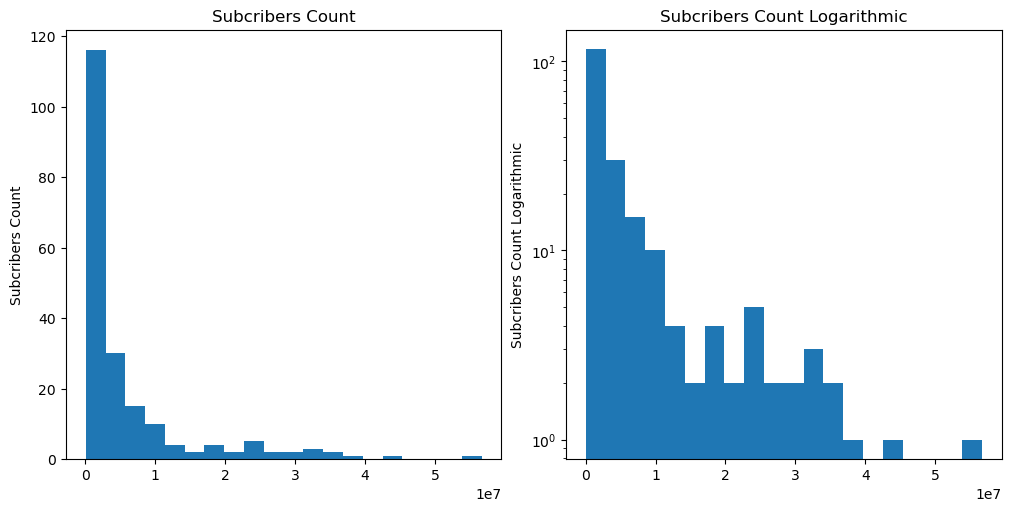

In [7]:
fig, axes = plt.subplots(1, 2,  figsize=(10,5),layout='constrained')
axes[0].hist(df['num_subcribers'], bins=20) # Enter the data for the histogram
axes[0].set_title("Subcribers Count")
axes[0].set_ylabel("Subcribers Count")
# add log scale
axes[1].hist(df['num_subcribers'], bins=20, log=True) # Enter the data for the histogram
axes[1].set_title("Subcribers Count Logarithmic")
axes[1].set_ylabel("Subcribers Count Logarithmic");

#### 2.2 Distribution of social impact

Repeat the above task but for the social impact of your users, also look at the logarithmic scale. Again, which one is more skewed?

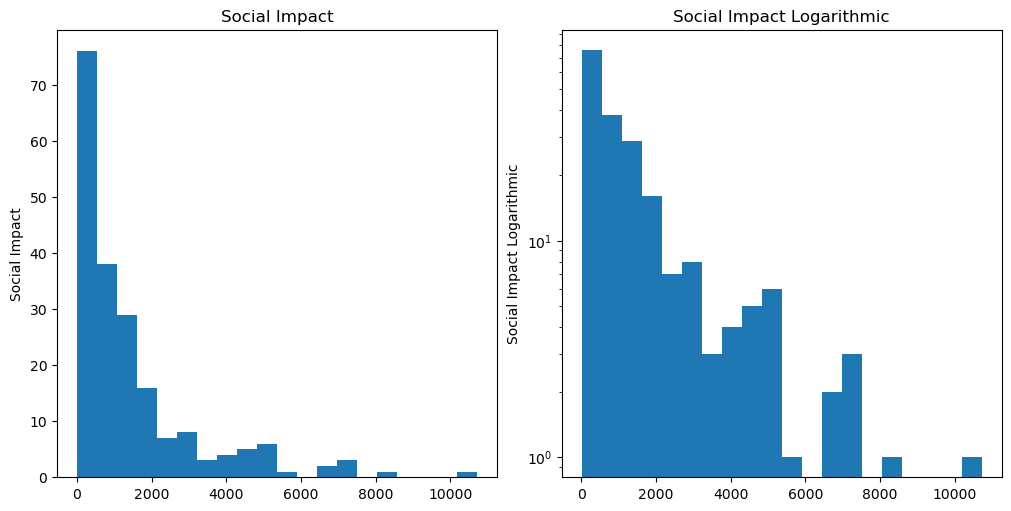

In [8]:
fig, axes = plt.subplots(1, 2,  figsize=(10,5),layout='constrained')
axes[0].hist(df['mean_score'], bins=20) # Enter the data for the histogram
axes[0].set_title("Social Impact")
axes[0].set_ylabel("Social Impact")
# add log scale
axes[1].hist(df['mean_score'], bins=20, log=True) # Enter the data for the histogram
axes[1].set_title("Social Impact Logarithmic")
axes[1].set_ylabel("Social Impact Logarithmic");

#### 2.3 Number of subscribers vs social impact
Create a scatter plot with the number of subscribers of each user on the x axis and the social impact of each user on the y axis. Both axis should be in logarithmic scale. Is there a relationship?  

Again you can use pandas [`scatter`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html) method with `logx` and `logy` set to true or you can use matplotlibs [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) method. Here you can use the `set_yscale` and `set_xscale` method of the axis to set them to `'log'`.

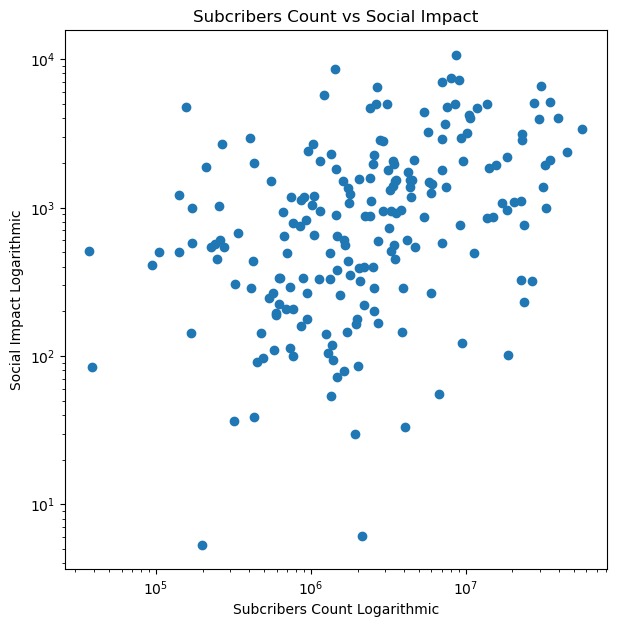

In [9]:
fig, ax = plt.subplots(1, 1,  figsize=(7,7))
ax.scatter(df['num_subcribers'], df['mean_score']) # Enter the data for the scatter plot
ax.set_title("Subcribers Count vs Social Impact")
ax.set_xlabel("Subcribers Count Logarithmic")
ax.set_ylabel("Social Impact Logarithmic")
ax.set_yscale('log')
ax.set_xscale('log')

### Exercise 3: Fit and visualize a regression model *(2 points)*

#### 3.1 Fit a linear model

First of all create two new columns. One should be called `SI`, and store the logarithm of the mean score, and another called `FC` with the logarithm of the amount of subscribers. For this you can use numpy's log function `np.log(...)`.  

Now fit a linear regression model with sklearn. For this use the class [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to create a linear regression instance and then call the `fit` method. `SI` is used as the dependent variable (target) and `FC` as the independent variable (feature).  

Print the model intercept and coefficient. For this you can use the models attributes `coef_` and `intercept_`.

In [10]:
# add logarithmic values of retweet count to the dataframe
df["SI"] = df["mean_score"].apply(lambda x: np.log(x))
df["FC"] = df["num_subcribers"].apply(lambda x: np.log(x))

In [11]:
# create a linear regression model from the dataframe with SI as the dependent variable and FC as the independent variable
model = LinearRegression().fit(X=df['FC'].values.reshape(-1, 1), y=df['SI']) # Enter the data for the linear regression model
print(model.coef_, model.intercept_)

[0.36131278] 1.302733796030835


#### 3.2 Plot the results
Now plot the same scatter plot as in 3.3 additional add a line plot which shows the fitted regression line of the model. For this use the intercept and the coefficient (slope). Does the line fit the data as you expected?  

It is easier to use matplotlib here to add the line plot to the scatter plot. For the line plot you can use matplotlibs [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) method. For the x values you can use numpy's [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace) method to evenly space x values in a certain range. The y values can be calculated with the intercept and the slope as follows:  
$
\begin{align}
    y = slope \cdot x + intercept
\end{align}
$

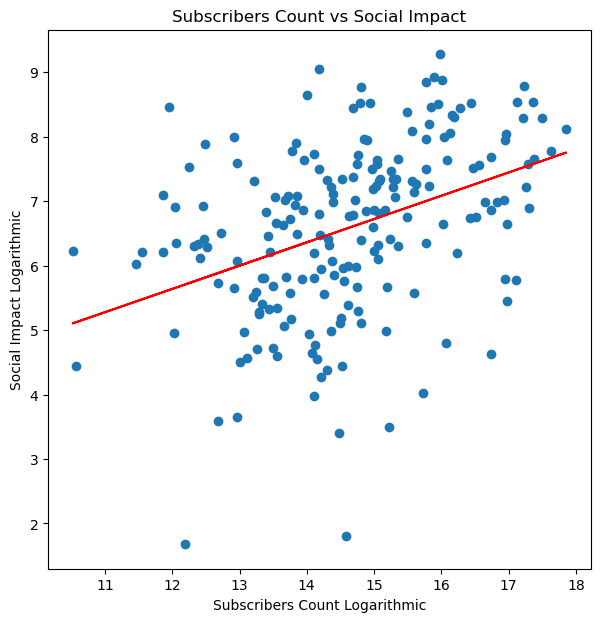

In [13]:
# scatter plot from before add the linear regression line
fig, ax = plt.subplots(1, 1,  figsize=(7,7))
ax.scatter(df["FC"], df["SI"]) # Enter the data for the scatter plot
ax.set_title("Subscribers Count vs Social Impact")
ax.set_xlabel("Subscribers Count Logarithmic")
ax.set_ylabel("Social Impact Logarithmic")
# add the linear regression line
x_min = df["FC"].min()
x_max = df["FC"].max()
# version with intercept and coef:
preds = model.coef_[0] * df["FC"].values + model.intercept_
ax.plot(df["FC"], preds, color='red'); 

#### 3.3 Calculate quality of the fit
Calculate the residuals of the model and save them in a vector. This can be done with following formula:
$
\begin{align}
residual = y_{true} - y_{pred}
\end{align}
$
where $y_{true}$ are the true values of the dependent variable (in our case `SI`) and $y_{pred}$ are the predicted values with the model. To get the predicted values of the model you can use the [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) method of the model.  

Afterwards calculate the variance of the residuals and the variance of the social impact variable. For this you can use numpy's [`var`](https://numpy.org/doc/stable/reference/generated/numpy.var.html) function. Is the variance of the residuals lower than the variance of the dependent variable? Calculate the proportion of variance explained ([R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination)) using the previously calculated variances.

In [14]:
prediction = model.predict(df['FC'].values.reshape(-1, 1)) # Predict the social impact
residual = df['SI'].values - prediction # Calculate the residual
print(np.var(residual))
print(np.var(df["SI"]))
print(1 - np.var(residual) / np.var(df["SI"])) # Calculate the proportion of variance explained

1.5450933949093684
1.8271835888848367
0.15438524934849762


#### 3.4 Distribution of residuals
Plot the histogram of residuals. Do they look normally distributted?  

Again you can use matplotlib as before to plot the histogram.

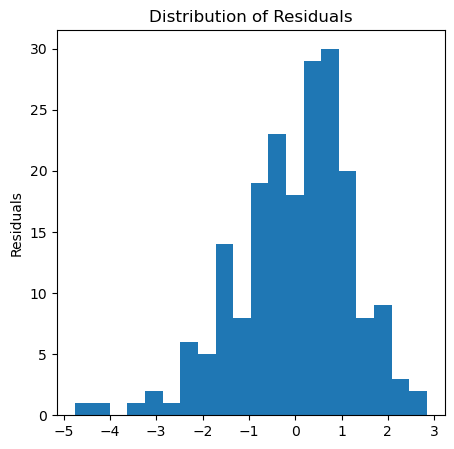

In [15]:
# plot histogram of residuals
fig, ax = plt.subplots(1, 1,  figsize=(5,5))
ax.hist(residual, bins=20) # Plot the residuals
ax.set_title("Distribution of Residuals")
ax.set_ylabel("Residuals");

### Exercise 4: Bootstrapping *(2 points)*

#### 4.1 One sample
For bootsrapping we first look at creating one sample. For this use the subscriber and social impact dataframe from before and sample random rows with replacement. This again can be done with pandas [`sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) method and the keyword argument `replace` set to `True`.  

Fit a new linear regression model with this new dataset. What is the value of the coefficient and the intercept now?

In [16]:
sampled_users = df.sample(100, replace=True)
single_sample_bs_model = LinearRegression()
single_sample_bs_model.fit(sampled_users[["FC"]], sampled_users["SI"])
print(single_sample_bs_model.coef_, single_sample_bs_model.intercept_)

[0.25672365] 2.8532345810315283


#### 4.2 Many bootstrap samples
Now repeat this 10000 times, save the resulting coefficient in a vector.

In [17]:
def get_bootstrap_coefs(df, x_col, y_col, n, sample_size, model=LinearRegression(), intercept=False):
    
    coefs = []
    model = model
    
    for i in tqdm(range(n)):
        # resample the data
        sampled_users = df.sample(sample_size, replace=True)
        
        model.fit(sampled_users[[x_col]], sampled_users[y_col])

        if intercept:
            coefs.append([model.intercept_, model.coef_[0]])
        else:
            coefs.extend(model.coef_)
    
    return np.array(coefs)

In [18]:
multi_sample_bs_model_coef = get_bootstrap_coefs(df=df, x_col='FC', y_col='SI', n=10_000, sample_size=100)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:25<00:00, 386.85it/s]


#### 4.3 Bootstrap histogram

Plot a histogram of the values resulting from the permutations and add a vertical line on the value of the coefficient of the original model (from exercise 4.1). For adding a vertical line to the histogram in matplotlib you can use the [`axvline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) method.  

 How far is the line from the center of the histogram?

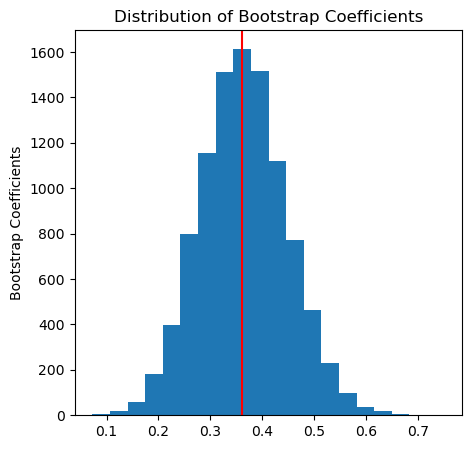

In [19]:
fig, ax = plt.subplots(1, 1,  figsize=(5,5))
ax.hist(multi_sample_bs_model_coef, bins=20) # Plot the multi_sample_bs_model_coef
ax.set_title("Distribution of Bootstrap Coefficients")
ax.set_ylabel("Bootstrap Coefficients")
# add vertical at original model coef
ax.axvline(model.coef_, color="red");

#### 4.4 Bootstrap scatterplot
* Repeat the plot from exercise 3.2
* Generate 500 bootstrap samples and save the resulting intercepts and coefficients in an array.
* Add a line for each of these 500 fitted models to your plot. Make sure to set the `alpha` parameter low, so that the plot remains readable.

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:01<00:00, 287.67it/s]


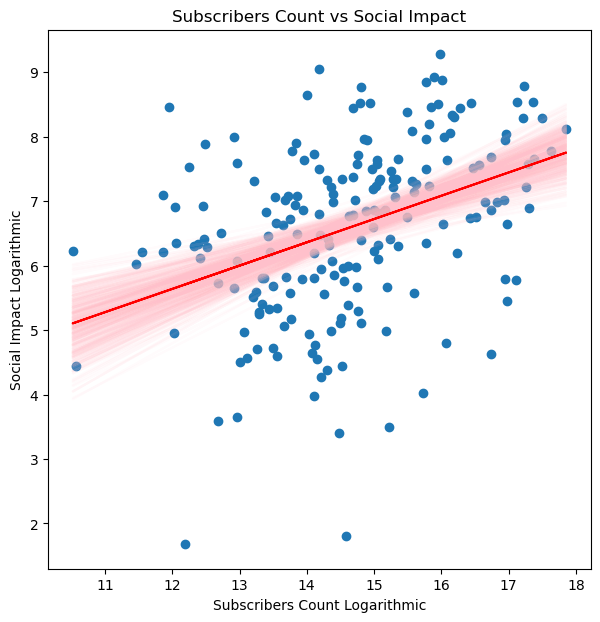

In [20]:
# scatter plot from before add the linear regression line
scatter_coefs = get_bootstrap_coefs(df=df, x_col='FC', y_col='SI', n=500, sample_size=100, intercept=True)

fig, ax = plt.subplots(1, 1,  figsize=(7,7))
ax.scatter(df["FC"], df["SI"]) # Enter the data for the scatter plot
ax.set_title("Subscribers Count vs Social Impact")
ax.set_xlabel("Subscribers Count Logarithmic")
ax.set_ylabel("Social Impact Logarithmic")
# add the linear regression line
x_min = df["FC"].min()
x_max = df["FC"].max()


for intercept, coef in scatter_coefs:
    preds = coef * df["FC"].values + intercept
    # version with intercept and coef:
    ax.plot(df["FC"], preds, color='pink', alpha=0.05); # Enter the data for the linear regression line

preds = model.coef_[0] * df["FC"].values + model.intercept_
ax.plot(df["FC"], preds, color='red');

### Exercise 5: Interpretation
* Do you find any relationship between social impact and the amount of subscribers?
* How sure are you that it is larger than zero? How sure are you that it is lower than 1?
* Is the value of the relationship within the ranges predicted by Social Impact Theory?
* Under that relationship, if I have 1000 subscribers, how many more subscribersrs do I need to double my social impact?